In [1]:
import pandas as pd
import numpy as np
import os
import math
import graphlab
import graphlab as gl
import graphlab.aggregate as agg
from graphlab import SArray

In [2]:
'''钢炮'''
path = '/home/zongyi/bimbo_data/'

In [4]:
train = gl.SFrame.read_csv(path + 'train_lag5_w9.csv', verbose=False)

In [4]:
town = gl.SFrame.read_csv(path + 'towns.csv', verbose=False)
train = train.join(town, on=['Agencia_ID','Producto_ID'], how='left')
train = train.fillna('t_c',1)
train = train.fillna('tcc',0)
train = train.fillna('tp_sum',0)
del train['Town']

In [5]:
del train['id']
del train['Venta_uni_hoy']
del train['Venta_hoy']
del train['Dev_uni_proxima']
del train['Dev_proxima']
del train['Demanda_uni_equil']


In [6]:
relag_train = gl.SFrame.read_csv(path + 're_lag_train.csv', verbose=False)
train = train.join(relag_train, on=['Cliente_ID','Producto_ID','Semana'], how='left')
train = train.fillna('re_lag1',0)
train = train.fillna('re_lag2',0)
train = train.fillna('re_lag3',0)
train = train.fillna('re_lag4',0)
train = train.fillna('re_lag5',0)
del relag_train


In [10]:
pd = gl.SFrame.read_csv(path + 'products.csv', verbose=False)
train = train.join(pd, on=['Producto_ID'], how='left')
train = train.fillna('prom',0)
train = train.fillna('weight',0)
train = train.fillna('pieces',1)
train = train.fillna('w_per_piece',0)
train = train.fillna('healthy',0)
train = train.fillna('drink',0)
del pd

In [14]:
client = gl.SFrame.read_csv(path + 'clients.csv', verbose=False)
train = train.join(client, on=['Cliente_ID'], how='left')
del client


+------------+-------+
| Cliente_ID | c_clt |
+------------+-------+
|     0      |   11  |
|     1      |   14  |
|     2      |   11  |
|     3      |   17  |
|     4      |   17  |
|     4      |   17  |
|     5      |   17  |
|     6      |   11  |
|     7      |   17  |
|     8      |   18  |
+------------+-------+
[935362 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [15]:
# del train['prior_sum']
# del train['lag_sum']
# del train['week_times']
del train['Semana']
# train

In [16]:
train['re_sum'] = (train['re_lag1'] + train['re_lag2'] + train['re_lag3'] + train['re_lag4'] + train['re_lag5'])/5

In [17]:
print train

+------------+----------+----------+------------+-------------+------------+------+
| Agencia_ID | Canal_ID | Ruta_SAK | Cliente_ID | Producto_ID | Demada_log | lag1 |
+------------+----------+----------+------------+-------------+------------+------+
|    3221    |    1     |   1620   |  1748240   |     160     |  1.09861   | 0.0  |
|    1378    |    1     |   2003   |  1295207   |    43316    |  0.693147  | 0.0  |
|    1116    |    1     |   4427   |   109877   |    35107    |  1.60944   | 0.0  |
|    1471    |    1     |   1611   |  2336095   |    43038    |  1.38629   | 0.0  |
|    2023    |    1     |   1208   |  2328381   |     1242    |  0.693147  | 0.0  |
|    4051    |    1     |   1215   |   121243   |    34255    |  1.09861   | 0.0  |
|    2214    |    1     |   1215   |   819679   |     1309    |  0.693147  | 0.0  |
|    1242    |    1     |   1222   |  4345031   |     1109    |  0.693147  | 0.0  |
|    1120    |    1     |   1616   |  4376818   |    31719    |  2.30259   |

In [19]:
# Make a train-test split
train_data, test_data = train.random_split(0.999)

# Create a model.

model = gl.boosted_trees_regression.create(train, target='Demada_log',
                                           step_size=0.1,
                                           max_iterations=1200,
                                           max_depth = 10,
                                          metric='rmse',
                                          random_seed=789,
                                          column_subsample=0.3,
                                          row_subsample=0.85,
                                          validation_set=test_data,
                                          model_checkpoint_path=path,
                                          model_checkpoint_interval=1200,
                                          resume_from_checkpoint=path+'model_checkpoint_1200')

Resuming from checkpoint at /home/zongyi/bimbo_data/model_checkpoint_1200

Boosted trees regression:

--------------------------------------------------------

Number of examples          : 10492579

Number of features          : 36

Number of unpacked features : 36

Resumed training from checkpoint at iteration 1200 which is greater than or equal to max_iterations 1200

In [49]:
# Make a train-test split
train_data, test_data = train.random_split(0.999)

# Create a model.
model = gl.boosted_trees_regression.create(train_data, target='Demada_log',
                                           step_size=0.1,
                                           max_iterations=1200,
                                           max_depth = 10,
                                          metric='rmse',
                                          random_seed=789,
                                          column_subsample=0.3,
                                          row_subsample=0.85,
                                          validation_set=test_data,
                                          model_checkpoint_path=path,
                                          model_checkpoint_interval=1200)

#500       | 14060.836344 | 0.435407      | 0.447519  


Boosted trees regression:

--------------------------------------------------------

Number of examples          : 10482127

Number of features          : 36

Number of unpacked features : 36

+-----------+--------------+---------------+-----------------+

| Iteration | Elapsed Time | Training-rmse | Validation-rmse |

+-----------+--------------+---------------+-----------------+

| 1         | 47.470004    | 1.264293      | 1.261316        |

| 2         | 95.477545    | 1.169706      | 1.167680        |

| 3         | 143.446649   | 1.078570      | 1.076424        |

| 4         | 190.093834   | 0.997881      | 0.996180        |

| 5         | 239.985328   | 0.924863      | 0.922625        |

| 6         | 286.563582   | 0.868839      | 0.867349        |

| 7         | 335.030050   | 0.812821      | 0.811212        |

| 8         | 383.742352   | 0.762782      | 0.760938        |

| 9         | 433.790097   | 0.719211      | 0.717103        |

| 10        | 482.177611   | 0.681480      | 0.679461        |

| 11        | 530.861494   | 0.650068      | 0.648001        |

| 12        | 579.915355   | 0.621856      | 0.619677        |

| 13        | 628.844955   | 0.598598      | 0.596261        |

| 14        | 676.459611   | 0.579155      | 0.577262        |

| 15        | 725.721512   | 0.561493      | 0.559538        |

| 16        | 778.635972   | 0.546689      | 0.544798        |

| 17        | 828.032593   | 0.534857      | 0.533012        |

| 18        | 876.655670   | 0.523681      | 0.521832        |

| 19        | 926.639887   | 0.514582      | 0.512762        |

| 20        | 975.949572   | 0.507046      | 0.505198        |

| 21        | 1027.122057  | 0.500331      | 0.498641        |

| 22        | 1077.101794  | 0.495326      | 0.493798        |

| 23        | 1127.997580  | 0.490421      | 0.488887        |

| 24        | 1179.863129  | 0.486112      | 0.484713        |

| 25        | 1228.157764  | 0.482751      | 0.481432        |

| 26        | 1279.640746  | 0.479227      | 0.477746        |

| 27        | 1331.974901  | 0.475645      | 0.474073        |

| 28        | 1381.216598  | 0.473537      | 0.471912        |

| 29        | 1434.820841  | 0.471503      | 0.469920        |

| 30        | 1487.421441  | 0.469952      | 0.468517        |

| 31        | 1541.921858  | 0.468085      | 0.466754        |

| 32        | 1594.385968  | 0.466731      | 0.465346        |

| 33        | 1646.708604  | 0.465742      | 0.464413        |

| 34        | 1700.472387  | 0.464366      | 0.463106        |

| 35        | 1756.110455  | 0.463356      | 0.462174        |

| 36        | 1806.995427  | 0.462461      | 0.461281        |

| 37        | 1858.449586  | 0.461935      | 0.460793        |

| 38        | 1909.415422  | 0.460857      | 0.459688        |

| 39        | 1964.015013  | 0.459995      | 0.458744        |

| 40        | 2018.130909  | 0.459109      | 0.457868        |

| 41        | 2073.626968  | 0.458584      | 0.457302        |

| 42        | 2129.203473  | 0.457860      | 0.456585        |

| 43        | 2180.379738  | 0.457367      | 0.456211        |

| 44        | 2230.520913  | 0.456968      | 0.455824        |

| 45        | 2282.354163  | 0.456473      | 0.455327        |

| 46        | 2335.068133  | 0.456035      | 0.454987        |

| 47        | 2384.465020  | 0.455775      | 0.454784        |

| 48        | 2440.908791  | 0.455379      | 0.454426        |

| 49        | 2494.442825  | 0.454936      | 0.454167        |

| 50        | 2546.931382  | 0.454573      | 0.453849        |

| 51        | 2598.160266  | 0.454282      | 0.453619        |

| 52        | 2650.557003  | 0.454009      | 0.453340        |

| 53        | 2702.826525  | 0.453656      | 0.453030        |

| 54        | 2754.369876  | 0.453416      | 0.452800        |

| 55        | 2806.428467  | 0.453137      | 0.452617        |

| 56        | 2857.239056  | 0.452883      | 0.452413        |

| 57        | 2911.832429  | 0.452560      | 0.452104        |

| 58        | 2963.824588  | 0.452352      | 0.451963        |

| 59        | 3018.791607  | 0.452065      | 0.451729        |

| 60        | 3070.377282  | 0.451827      | 0.451580        |

| 61        | 3151.075022  | 0.451617      | 0.451410        |

| 62        | 3207.866372  | 0.451367      | 0.451234        |

| 63        | 3259.344816  | 0.451207      | 0.451145        |

| 64        | 3313.232209  | 0.450992      | 0.451014        |

| 65        | 3368.208927  | 0.450745      | 0.450779        |

| 66        | 3424.652861  | 0.450496      | 0.450521        |

| 67        | 3478.922436  | 0.450207      | 0.450269        |

| 68        | 3533.668294  | 0.450058      | 0.450107        |

| 69        | 3588.510245  | 0.449858      | 0.449911        |

| 70        | 3641.846045  | 0.449714      | 0.449751        |

| 71        | 3696.894260  | 0.449513      | 0.449570        |

| 72        | 3747.201240  | 0.449337      | 0.449393        |

| 73        | 3798.594768  | 0.449208      | 0.449270        |

| 74        | 3852.314952  | 0.449027      | 0.449095        |

| 75        | 3907.178327  | 0.448818      | 0.448970        |

| 76        | 3963.897261  | 0.448593      | 0.448783        |

| 77        | 4015.045107  | 0.448492      | 0.448741        |

| 78        | 4067.102330  | 0.448266      | 0.448524        |

| 79        | 4122.633709  | 0.448091      | 0.448387        |

| 80        | 4171.612188  | 0.447918      | 0.448243        |

| 81        | 4227.214335  | 0.447755      | 0.448101        |

| 82        | 4282.830311  | 0.447567      | 0.447908        |

| 83        | 4338.608706  | 0.447444      | 0.447857        |

| 84        | 4390.800580  | 0.447316      | 0.447761        |

| 85        | 4444.839786  | 0.447160      | 0.447585        |

| 86        | 4499.115488  | 0.446982      | 0.447414        |

| 87        | 4554.347419  | 0.446862      | 0.447295        |

| 88        | 4605.527014  | 0.446797      | 0.447270        |

| 89        | 4657.806361  | 0.446654      | 0.447152        |

| 90        | 4711.571567  | 0.446492      | 0.447028        |

| 91        | 4763.084418  | 0.446395      | 0.446981        |

| 92        | 4814.851060  | 0.446307      | 0.446884        |

| 93        | 4868.362945  | 0.446193      | 0.446781        |

| 94        | 4922.931399  | 0.446049      | 0.446665        |

| 95        | 4977.571344  | 0.445908      | 0.446561        |

| 96        | 5031.210784  | 0.445821      | 0.446509        |

| 97        | 5085.727052  | 0.445680      | 0.446358        |

| 98        | 5139.659478  | 0.445590      | 0.446315        |

| 99        | 5195.239597  | 0.445478      | 0.446265        |

| 100       | 5247.025152  | 0.445322      | 0.446126        |

| 101       | 5301.780642  | 0.445215      | 0.446033        |

| 102       | 5354.309864  | 0.445088      | 0.445926        |

| 103       | 5407.506389  | 0.444918      | 0.445807        |

| 104       | 5462.375980  | 0.444839      | 0.445752        |

| 105       | 5512.818524  | 0.444742      | 0.445721        |

| 106       | 5568.196587  | 0.444660      | 0.445631        |

| 107       | 5619.396051  | 0.444583      | 0.445620        |

| 108       | 5673.764228  | 0.444448      | 0.445454        |

| 109       | 5728.820467  | 0.444353      | 0.445349        |

| 110       | 5786.506641  | 0.444193      | 0.445265        |

| 111       | 5839.788716  | 0.444096      | 0.445196        |

| 112       | 5895.158053  | 0.443998      | 0.445112        |

| 113       | 5949.918017  | 0.443911      | 0.445071        |

| 114       | 6001.788766  | 0.443852      | 0.445042        |

| 115       | 6056.631699  | 0.443718      | 0.444853        |

| 116       | 6112.346475  | 0.443607      | 0.444757        |

| 117       | 6169.296376  | 0.443493      | 0.444676        |

| 118       | 6220.686371  | 0.443421      | 0.444595        |

| 119       | 6274.010836  | 0.443351      | 0.444599        |

| 120       | 6326.528077  | 0.443273      | 0.444554        |

| 121       | 6381.003589  | 0.443185      | 0.444479        |

| 122       | 6434.983525  | 0.443115      | 0.444469        |

| 123       | 6488.881590  | 0.443036      | 0.444417        |

| 124       | 6542.509916  | 0.442971      | 0.444350        |

| 125       | 6599.426874  | 0.442878      | 0.444284        |

| 126       | 6655.872773  | 0.442797      | 0.444193        |

| 127       | 6707.406331  | 0.442736      | 0.444157        |

| 128       | 6783.862243  | 0.442670      | 0.444107        |

| 129       | 6841.388803  | 0.442560      | 0.444018        |

| 130       | 6899.759596  | 0.442423      | 0.443933        |

| 131       | 6956.212752  | 0.442355      | 0.443867        |

| 132       | 7011.036254  | 0.442255      | 0.443777        |

| 133       | 7066.086060  | 0.442161      | 0.443762        |

| 134       | 7119.362989  | 0.442084      | 0.443745        |

| 135       | 7172.934012  | 0.442048      | 0.443708        |

| 136       | 7227.762733  | 0.441980      | 0.443699        |

| 137       | 7277.944725  | 0.441891      | 0.443605        |

| 138       | 7333.989919  | 0.441792      | 0.443557        |

| 139       | 7385.034550  | 0.441733      | 0.443498        |

| 140       | 7436.924361  | 0.441694      | 0.443442        |

| 141       | 7496.052321  | 0.441590      | 0.443342        |

| 142       | 7549.742075  | 0.441510      | 0.443270        |

| 143       | 7601.942558  | 0.441458      | 0.443216        |

| 144       | 7656.437182  | 0.441403      | 0.443180        |

| 145       | 7712.030066  | 0.441341      | 0.443084        |

| 146       | 7764.010551  | 0.441327      | 0.443071        |

| 147       | 7818.224384  | 0.441244      | 0.442962        |

| 148       | 7872.593902  | 0.441182      | 0.442891        |

| 149       | 7925.423447  | 0.441136      | 0.442889        |

| 150       | 7980.805641  | 0.441046      | 0.442791        |

| 151       | 8034.170006  | 0.440941      | 0.442743        |

| 152       | 8085.969184  | 0.440892      | 0.442699        |

| 153       | 8142.192727  | 0.440812      | 0.442626        |

| 154       | 8194.767956  | 0.440741      | 0.442550        |

| 155       | 8248.088057  | 0.440697      | 0.442530        |

| 156       | 8302.570784  | 0.440651      | 0.442523        |

| 157       | 8357.182676  | 0.440591      | 0.442472        |

| 158       | 8413.374138  | 0.440503      | 0.442397        |

| 159       | 8468.286995  | 0.440408      | 0.442322        |

| 160       | 8521.079125  | 0.440372      | 0.442308        |

| 161       | 8575.442421  | 0.440320      | 0.442283        |

| 162       | 8631.301979  | 0.440235      | 0.442221        |

| 163       | 8682.078963  | 0.440187      | 0.442200        |

| 164       | 8735.528659  | 0.440130      | 0.442167        |

| 165       | 8791.150348  | 0.440077      | 0.442120        |

| 166       | 8846.212253  | 0.440034      | 0.442085        |

| 167       | 8901.020165  | 0.439992      | 0.442050        |

| 168       | 8957.907510  | 0.439945      | 0.442023        |

| 169       | 9012.822856  | 0.439897      | 0.442031        |

| 170       | 9069.649806  | 0.439815      | 0.441960        |

| 171       | 9126.661575  | 0.439748      | 0.441917        |

| 172       | 9182.377778  | 0.439667      | 0.441867        |

| 173       | 9236.777805  | 0.439634      | 0.441847        |

| 174       | 9292.003853  | 0.439592      | 0.441838        |

| 175       | 9344.774537  | 0.439543      | 0.441800        |

| 176       | 9399.399337  | 0.439483      | 0.441767        |

| 177       | 9453.063084  | 0.439456      | 0.441758        |

| 178       | 9509.318394  | 0.439416      | 0.441733        |

| 179       | 9562.668420  | 0.439346      | 0.441735        |

| 180       | 9617.139458  | 0.439293      | 0.441694        |

| 181       | 9671.285366  | 0.439229      | 0.441614        |

| 182       | 9729.612530  | 0.439159      | 0.441576        |

| 183       | 9784.293242  | 0.439113      | 0.441601        |

| 184       | 9842.018985  | 0.439078      | 0.441593        |

| 185       | 9899.400957  | 0.438998      | 0.441552        |

| 186       | 9955.124889  | 0.438958      | 0.441500        |

| 187       | 10008.271045 | 0.438930      | 0.441446        |

| 188       | 10061.113967 | 0.438881      | 0.441383        |

| 189       | 10116.786280 | 0.438853      | 0.441366        |

| 190       | 10171.797674 | 0.438809      | 0.441328        |

| 191       | 10223.869172 | 0.438781      | 0.441309        |

| 192       | 10280.110326 | 0.438719      | 0.441258        |

| 193       | 10353.831943 | 0.438677      | 0.441245        |

| 194       | 10413.743182 | 0.438613      | 0.441167        |

| 195       | 10468.764511 | 0.438577      | 0.441152        |

| 196       | 10525.370922 | 0.438535      | 0.441115        |

| 197       | 10581.035429 | 0.438497      | 0.441090        |

| 198       | 10636.391932 | 0.438459      | 0.441079        |

| 199       | 10692.247477 | 0.438417      | 0.441074        |

| 200       | 10749.959517 | 0.438359      | 0.441068        |

| 201       | 10804.512261 | 0.438280      | 0.441029        |

| 202       | 10859.825062 | 0.438235      | 0.441006        |

| 203       | 10913.170486 | 0.438198      | 0.440960        |

| 204       | 10965.456450 | 0.438159      | 0.440983        |

| 205       | 11021.742107 | 0.438093      | 0.440922        |

| 206       | 11075.997162 | 0.438034      | 0.440903        |

| 207       | 11129.196647 | 0.437986      | 0.440832        |

| 208       | 11184.656947 | 0.437933      | 0.440780        |

| 209       | 11242.565231 | 0.437891      | 0.440762        |

| 210       | 11295.727169 | 0.437874      | 0.440755        |

| 211       | 11352.333790 | 0.437831      | 0.440727        |

| 212       | 11407.151507 | 0.437785      | 0.440704        |

| 213       | 11461.310716 | 0.437723      | 0.440645        |

| 214       | 11514.787372 | 0.437649      | 0.440601        |

| 215       | 11572.130538 | 0.437594      | 0.440532        |

| 216       | 11627.730467 | 0.437563      | 0.440522        |

| 217       | 11682.443794 | 0.437522      | 0.440481        |

| 218       | 11736.294050 | 0.437491      | 0.440490        |

| 219       | 11790.223015 | 0.437452      | 0.440464        |

| 220       | 11846.878918 | 0.437410      | 0.440430        |

| 221       | 11902.768573 | 0.437380      | 0.440423        |

| 222       | 11956.936919 | 0.437345      | 0.440414        |

| 223       | 12011.714413 | 0.437307      | 0.440386        |

| 224       | 12064.508041 | 0.437266      | 0.440371        |

| 225       | 12119.907284 | 0.437209      | 0.440371        |

| 226       | 12175.604987 | 0.437144      | 0.440324        |

| 227       | 12230.280874 | 0.437084      | 0.440274        |

| 228       | 12282.610946 | 0.437067      | 0.440270        |

| 229       | 12336.229548 | 0.437038      | 0.440261        |

| 230       | 12389.997328 | 0.437003      | 0.440254        |

| 231       | 12446.474660 | 0.436953      | 0.440227        |

| 232       | 12500.855446 | 0.436921      | 0.440241        |

| 233       | 12555.931008 | 0.436872      | 0.440192        |

| 234       | 12610.055736 | 0.436848      | 0.440206        |

| 235       | 12665.732926 | 0.436803      | 0.440180        |

| 236       | 12718.647174 | 0.436763      | 0.440154        |

| 237       | 12775.376764 | 0.436705      | 0.440118        |

| 238       | 12831.927064 | 0.436649      | 0.440061        |

| 239       | 12886.951842 | 0.436598      | 0.440040        |

| 240       | 12941.287289 | 0.436568      | 0.440027        |

| 241       | 12993.657375 | 0.436537      | 0.440022        |

| 242       | 13046.937280 | 0.436506      | 0.440004        |

| 243       | 13101.791715 | 0.436472      | 0.439999        |

| 244       | 13155.558358 | 0.436452      | 0.439987        |

| 245       | 13212.193875 | 0.436412      | 0.439975        |

| 246       | 13268.333259 | 0.436376      | 0.439863        |

| 247       | 13327.343261 | 0.436324      | 0.439833        |

| 248       | 13381.513733 | 0.436301      | 0.439816        |

| 249       | 13432.591234 | 0.436277      | 0.439816        |

| 250       | 13487.715702 | 0.436246      | 0.439779        |

| 251       | 13542.528153 | 0.436219      | 0.439767        |

| 252       | 13596.920766 | 0.436182      | 0.439761        |

| 253       | 13648.741740 | 0.436151      | 0.439756        |

| 254       | 13702.512953 | 0.436130      | 0.439730        |

| 255       | 13760.968428 | 0.436071      | 0.439693        |

| 256       | 13816.926704 | 0.436029      | 0.439650        |

| 257       | 13870.362988 | 0.435993      | 0.439649        |

| 258       | 13940.473970 | 0.435954      | 0.439605        |

| 259       | 14000.644271 | 0.435901      | 0.439570        |

| 260       | 14055.007107 | 0.435883      | 0.439563        |

| 261       | 14116.244710 | 0.435869      | 0.439544        |

| 262       | 14170.668831 | 0.435846      | 0.439513        |

| 263       | 14226.610040 | 0.435806      | 0.439489        |

| 264       | 14281.655628 | 0.435781      | 0.439477        |

| 265       | 14337.398315 | 0.435756      | 0.439478        |

| 266       | 14391.756406 | 0.435723      | 0.439376        |

| 267       | 14448.062706 | 0.435687      | 0.439359        |

| 268       | 14506.770663 | 0.435640      | 0.439285        |

| 269       | 14559.660834 | 0.435617      | 0.439274        |

| 270       | 14613.229854 | 0.435583      | 0.439298        |

| 271       | 14668.926405 | 0.435555      | 0.439319        |

| 272       | 14720.981401 | 0.435505      | 0.439299        |

| 273       | 14778.443889 | 0.435467      | 0.439292        |

| 274       | 14831.530359 | 0.435427      | 0.439291        |

| 275       | 14888.967776 | 0.435381      | 0.439295        |

| 276       | 14943.958481 | 0.435351      | 0.439255        |

| 277       | 14999.818563 | 0.435328      | 0.439246        |

| 278       | 15054.413056 | 0.435301      | 0.439252        |

| 279       | 15105.876722 | 0.435275      | 0.439236        |

| 280       | 15156.801721 | 0.435254      | 0.439217        |

| 281       | 15214.522789 | 0.435233      | 0.439198        |

| 282       | 15267.055978 | 0.435208      | 0.439152        |

| 283       | 15320.105491 | 0.435158      | 0.439104        |

| 284       | 15373.676765 | 0.435147      | 0.439108        |

| 285       | 15427.770016 | 0.435118      | 0.439068        |

| 286       | 15483.963028 | 0.435090      | 0.439067        |

| 287       | 15537.723329 | 0.435066      | 0.439026        |

| 288       | 15595.102679 | 0.435031      | 0.439028        |

| 289       | 15652.370605 | 0.434983      | 0.439010        |

| 290       | 15705.262398 | 0.434953      | 0.439003        |

| 291       | 15761.523581 | 0.434918      | 0.439000        |

| 292       | 15811.796765 | 0.434895      | 0.438998        |

| 293       | 15865.911874 | 0.434867      | 0.438994        |

| 294       | 15922.516675 | 0.434844      | 0.438959        |

| 295       | 15976.260491 | 0.434801      | 0.438934        |

| 296       | 16032.551491 | 0.434777      | 0.438929        |

| 297       | 16086.796681 | 0.434727      | 0.438877        |

| 298       | 16145.910223 | 0.434687      | 0.438840        |

| 299       | 16202.339726 | 0.434655      | 0.438815        |

| 300       | 16255.562746 | 0.434644      | 0.438783        |

| 301       | 16310.894124 | 0.434606      | 0.438764        |

| 302       | 16368.568051 | 0.434568      | 0.438751        |

| 303       | 16423.841821 | 0.434544      | 0.438736        |

| 304       | 16477.046718 | 0.434517      | 0.438715        |

| 305       | 16530.443930 | 0.434499      | 0.438684        |

| 306       | 16583.745324 | 0.434466      | 0.438683        |

| 307       | 16636.778484 | 0.434448      | 0.438671        |

| 308       | 16691.938471 | 0.434411      | 0.438659        |

| 309       | 16745.018529 | 0.434389      | 0.438605        |

| 310       | 16799.631233 | 0.434350      | 0.438595        |

| 311       | 16853.120101 | 0.434326      | 0.438579        |

| 312       | 16908.775470 | 0.434300      | 0.438551        |

| 313       | 16962.074921 | 0.434276      | 0.438543        |

| 314       | 17015.136461 | 0.434252      | 0.438520        |

| 315       | 17069.031714 | 0.434236      | 0.438520        |

| 316       | 17127.020655 | 0.434184      | 0.438462        |

| 317       | 17183.629047 | 0.434161      | 0.438444        |

| 318       | 17236.998831 | 0.434133      | 0.438438        |

| 319       | 17292.906287 | 0.434087      | 0.438423        |

| 320       | 17345.284445 | 0.434066      | 0.438406        |

| 321       | 17401.924308 | 0.434019      | 0.438379        |

| 322       | 17459.634030 | 0.433981      | 0.438387        |

| 323       | 17515.547555 | 0.433947      | 0.438363        |

| 324       | 17594.828201 | 0.433902      | 0.438327        |

| 325       | 17647.267298 | 0.433882      | 0.438300        |

| 326       | 17704.524109 | 0.433846      | 0.438282        |

| 327       | 17758.234039 | 0.433814      | 0.438247        |

| 328       | 17813.035675 | 0.433764      | 0.438239        |

| 329       | 17867.325883 | 0.433732      | 0.438229        |

| 330       | 17925.260176 | 0.433685      | 0.438220        |

| 331       | 17977.427726 | 0.433659      | 0.438211        |

| 332       | 18032.782382 | 0.433635      | 0.438211        |

| 333       | 18086.384822 | 0.433607      | 0.438215        |

| 334       | 18139.396207 | 0.433596      | 0.438225        |

| 335       | 18196.348113 | 0.433556      | 0.438220        |

| 336       | 18250.950580 | 0.433536      | 0.438202        |

| 337       | 18306.689859 | 0.433505      | 0.438182        |

| 338       | 18362.261530 | 0.433477      | 0.438082        |

| 339       | 18417.585532 | 0.433444      | 0.438068        |

| 340       | 18472.424295 | 0.433417      | 0.438049        |

| 341       | 18527.814051 | 0.433389      | 0.438015        |

| 342       | 18583.993231 | 0.433377      | 0.438004        |

| 343       | 18638.430923 | 0.433346      | 0.437977        |

| 344       | 18695.338447 | 0.433313      | 0.437983        |

| 345       | 18753.930002 | 0.433279      | 0.437960        |

| 346       | 18812.147928 | 0.433256      | 0.437948        |

| 347       | 18868.082707 | 0.433222      | 0.437892        |

| 348       | 18923.951270 | 0.433189      | 0.437878        |

| 349       | 18979.470575 | 0.433164      | 0.437841        |

| 350       | 19033.857469 | 0.433143      | 0.437819        |

| 351       | 19089.273893 | 0.433106      | 0.437805        |

| 352       | 19139.845234 | 0.433078      | 0.437764        |

| 353       | 19195.447112 | 0.433042      | 0.437763        |

| 354       | 19250.959176 | 0.433029      | 0.437740        |

| 355       | 19306.570215 | 0.433000      | 0.437727        |

| 356       | 19362.749465 | 0.432963      | 0.437719        |

| 357       | 19417.503405 | 0.432940      | 0.437744        |

| 358       | 19472.223786 | 0.432914      | 0.437749        |

| 359       | 19526.001599 | 0.432901      | 0.437738        |

| 360       | 19579.658810 | 0.432871      | 0.437721        |

| 361       | 19634.610998 | 0.432840      | 0.437702        |

| 362       | 19687.669754 | 0.432819      | 0.437703        |

| 363       | 19740.924494 | 0.432793      | 0.437676        |

| 364       | 19796.041891 | 0.432766      | 0.437675        |

| 365       | 19850.139283 | 0.432750      | 0.437654        |

| 366       | 19905.694904 | 0.432732      | 0.437648        |

| 367       | 19959.713716 | 0.432697      | 0.437639        |

| 368       | 20013.615199 | 0.432687      | 0.437643        |

| 369       | 20068.851531 | 0.432660      | 0.437669        |

| 370       | 20123.471453 | 0.432639      | 0.437692        |

| 371       | 20179.806321 | 0.432601      | 0.437629        |

| 372       | 20232.414207 | 0.432576      | 0.437627        |

| 373       | 20284.765985 | 0.432566      | 0.437622        |

| 374       | 20341.755400 | 0.432533      | 0.437617        |

| 375       | 20398.817335 | 0.432516      | 0.437606        |

| 376       | 20453.856482 | 0.432471      | 0.437606        |

| 377       | 20506.343281 | 0.432457      | 0.437596        |

| 378       | 20562.283703 | 0.432435      | 0.437583        |

| 379       | 20619.417135 | 0.432403      | 0.437579        |

| 380       | 20675.784682 | 0.432388      | 0.437574        |

| 381       | 20733.964057 | 0.432361      | 0.437548        |

| 382       | 20788.104253 | 0.432333      | 0.437507        |

| 383       | 20843.055563 | 0.432314      | 0.437494        |

| 384       | 20894.652795 | 0.432291      | 0.437454        |

| 385       | 20951.435018 | 0.432255      | 0.437424        |

| 386       | 21006.842517 | 0.432233      | 0.437405        |

| 387       | 21060.639877 | 0.432198      | 0.437411        |

| 388       | 21116.493103 | 0.432179      | 0.437412        |

| 389       | 21188.895261 | 0.432169      | 0.437415        |

| 390       | 21242.416149 | 0.432154      | 0.437416        |

| 391       | 21296.570023 | 0.432131      | 0.437400        |

| 392       | 21352.100483 | 0.432106      | 0.437408        |

| 393       | 21404.882400 | 0.432099      | 0.437411        |

| 394       | 21458.170356 | 0.432079      | 0.437406        |

| 395       | 21516.072864 | 0.432040      | 0.437404        |

| 396       | 21570.913413 | 0.432023      | 0.437402        |

| 397       | 21627.800766 | 0.432012      | 0.437404        |

| 398       | 21682.491865 | 0.431992      | 0.437421        |

| 399       | 21738.156742 | 0.431967      | 0.437423        |

| 400       | 21796.271034 | 0.431938      | 0.437430        |

| 401       | 21856.253471 | 0.431912      | 0.437405        |

| 402       | 21908.374207 | 0.431890      | 0.437414        |

| 403       | 21962.524168 | 0.431876      | 0.437410        |

| 404       | 22018.248788 | 0.431856      | 0.437407        |

| 405       | 22070.987520 | 0.431833      | 0.437390        |

| 406       | 22128.301746 | 0.431804      | 0.437366        |

| 407       | 22185.931374 | 0.431757      | 0.437321        |

| 408       | 22241.754343 | 0.431745      | 0.437327        |

| 409       | 22300.670961 | 0.431706      | 0.437246        |

| 410       | 22353.561813 | 0.431696      | 0.437243        |

| 411       | 22413.520151 | 0.431653      | 0.437225        |

| 412       | 22469.632403 | 0.431635      | 0.437197        |

| 413       | 22524.027393 | 0.431617      | 0.437204        |

| 414       | 22574.746662 | 0.431598      | 0.437218        |

| 415       | 22631.707868 | 0.431575      | 0.437220        |

| 416       | 22685.670215 | 0.431546      | 0.437178        |

| 417       | 22740.861977 | 0.431527      | 0.437166        |

| 418       | 22795.702545 | 0.431501      | 0.437160        |

| 419       | 22849.580562 | 0.431484      | 0.437148        |

| 420       | 22907.321982 | 0.431451      | 0.437140        |

| 421       | 22960.153320 | 0.431428      | 0.437162        |

| 422       | 23013.720896 | 0.431400      | 0.437150        |

| 423       | 23071.862037 | 0.431352      | 0.437094        |

| 424       | 23125.371063 | 0.431347      | 0.437100        |

| 425       | 23179.596084 | 0.431342      | 0.437099        |

| 426       | 23233.728799 | 0.431316      | 0.437130        |

| 427       | 23289.235436 | 0.431298      | 0.437118        |

| 428       | 23343.662527 | 0.431269      | 0.437097        |

| 429       | 23399.890644 | 0.431248      | 0.437099        |

| 430       | 23455.302853 | 0.431220      | 0.437078        |

| 431       | 23508.594206 | 0.431209      | 0.437074        |

| 432       | 23567.785216 | 0.431197      | 0.437015        |

| 433       | 23623.470230 | 0.431167      | 0.437008        |

| 434       | 23677.409511 | 0.431139      | 0.437010        |

| 435       | 23732.830451 | 0.431112      | 0.436999        |

| 436       | 23787.908296 | 0.431075      | 0.436984        |

| 437       | 23843.068254 | 0.431053      | 0.436978        |

| 438       | 23897.141228 | 0.431032      | 0.436956        |

| 439       | 23953.745604 | 0.431008      | 0.436944        |

| 440       | 24007.596597 | 0.430997      | 0.436944        |

| 441       | 24060.800613 | 0.430975      | 0.436942        |

| 442       | 24114.288222 | 0.430968      | 0.436946        |

| 443       | 24167.182386 | 0.430957      | 0.436947        |

| 444       | 24220.851368 | 0.430937      | 0.436935        |

| 445       | 24275.652891 | 0.430915      | 0.436915        |

| 446       | 24332.492751 | 0.430879      | 0.436878        |

| 447       | 24388.539500 | 0.430854      | 0.436846        |

| 448       | 24444.457517 | 0.430837      | 0.436855        |

| 449       | 24499.035027 | 0.430797      | 0.436785        |

| 450       | 24554.691261 | 0.430779      | 0.436794        |

| 451       | 24607.963820 | 0.430762      | 0.436809        |

| 452       | 24661.715415 | 0.430723      | 0.436784        |

| 453       | 24718.675059 | 0.430692      | 0.436764        |

| 454       | 24797.296898 | 0.430678      | 0.436764        |

| 455       | 24849.414235 | 0.430656      | 0.436749        |

| 456       | 24901.905907 | 0.430647      | 0.436754        |

| 457       | 24956.619699 | 0.430620      | 0.436738        |

| 458       | 25008.776864 | 0.430596      | 0.436728        |

| 459       | 25064.043004 | 0.430586      | 0.436725        |

| 460       | 25117.966380 | 0.430570      | 0.436717        |

| 461       | 25170.085357 | 0.430551      | 0.436701        |

| 462       | 25228.385403 | 0.430523      | 0.436673        |

| 463       | 25284.702394 | 0.430491      | 0.436659        |

| 464       | 25341.558573 | 0.430469      | 0.436646        |

| 465       | 25393.628160 | 0.430456      | 0.436625        |

| 466       | 25445.294839 | 0.430419      | 0.436609        |

| 467       | 25499.512917 | 0.430409      | 0.436596        |

| 468       | 25555.410666 | 0.430399      | 0.436594        |

| 469       | 25610.362911 | 0.430388      | 0.436590        |

| 470       | 25665.056419 | 0.430367      | 0.436582        |

| 471       | 25722.318002 | 0.430330      | 0.436575        |

| 472       | 25774.530349 | 0.430314      | 0.436583        |

| 473       | 25832.737514 | 0.430292      | 0.436575        |

| 474       | 25884.774987 | 0.430254      | 0.436576        |

| 475       | 25938.506709 | 0.430244      | 0.436568        |

| 476       | 25994.126749 | 0.430225      | 0.436579        |

| 477       | 26050.332251 | 0.430206      | 0.436573        |

| 478       | 26104.018268 | 0.430193      | 0.436572        |

| 479       | 26155.292128 | 0.430166      | 0.436556        |

| 480       | 26209.931368 | 0.430142      | 0.436540        |

| 481       | 26267.648263 | 0.430118      | 0.436540        |

| 482       | 26326.339285 | 0.430079      | 0.436515        |

| 483       | 26383.151416 | 0.430063      | 0.436506        |

| 484       | 26439.697994 | 0.430043      | 0.436497        |

| 485       | 26499.167641 | 0.430019      | 0.436483        |

| 486       | 26551.999909 | 0.430004      | 0.436516        |

| 487       | 26606.666631 | 0.429987      | 0.436520        |

| 488       | 26660.883651 | 0.429980      | 0.436513        |

| 489       | 26715.257838 | 0.429978      | 0.436512        |

| 490       | 26770.707322 | 0.429952      | 0.436489        |

| 491       | 26825.402218 | 0.429934      | 0.436476        |

| 492       | 26877.888259 | 0.429917      | 0.436486        |

| 493       | 26931.427504 | 0.429894      | 0.436480        |

| 494       | 26985.523190 | 0.429875      | 0.436460        |

| 495       | 27037.843484 | 0.429864      | 0.436464        |

| 496       | 27094.061927 | 0.429840      | 0.436467        |

| 497       | 27148.203345 | 0.429820      | 0.436450        |

| 498       | 27204.094347 | 0.429798      | 0.436478        |

| 499       | 27257.767192 | 0.429777      | 0.436414        |

| 500       | 27310.234706 | 0.429753      | 0.436415        |

| 501       | 27366.710816 | 0.429725      | 0.436417        |

| 502       | 27420.581907 | 0.429703      | 0.436419        |

| 503       | 27476.982269 | 0.429678      | 0.436392        |

| 504       | 27532.774222 | 0.429658      | 0.436391        |

| 505       | 27587.309632 | 0.429637      | 0.436395        |

| 506       | 27643.080716 | 0.429605      | 0.436380        |

| 507       | 27697.646460 | 0.429584      | 0.436371        |

| 508       | 27750.424066 | 0.429551      | 0.436308        |

| 509       | 27804.418452 | 0.429535      | 0.436295        |

| 510       | 27860.682283 | 0.429508      | 0.436292        |

| 511       | 27914.848693 | 0.429486      | 0.436278        |

| 512       | 27971.903835 | 0.429453      | 0.436252        |

| 513       | 28031.435935 | 0.429417      | 0.436222        |

| 514       | 28085.782929 | 0.429400      | 0.436222        |

| 515       | 28138.706809 | 0.429390      | 0.436223        |

| 516       | 28192.718393 | 0.429373      | 0.436209        |

| 517       | 28248.357116 | 0.429349      | 0.436195        |

| 518       | 28303.947157 | 0.429333      | 0.436190        |

| 519       | 28358.428414 | 0.429304      | 0.436170        |

| 520       | 28420.148866 | 0.429293      | 0.436161        |

| 521       | 28482.223012 | 0.429258      | 0.436157        |

| 522       | 28539.335781 | 0.429228      | 0.436147        |

| 523       | 28596.177582 | 0.429196      | 0.436120        |

| 524       | 28651.622686 | 0.429180      | 0.436119        |

| 525       | 28707.326660 | 0.429162      | 0.436065        |

| 526       | 28762.153436 | 0.429142      | 0.436052        |

| 527       | 28816.722854 | 0.429128      | 0.436043        |

| 528       | 28868.661865 | 0.429112      | 0.436033        |

| 529       | 28926.187586 | 0.429088      | 0.436014        |

| 530       | 28980.691851 | 0.429073      | 0.436015        |

| 531       | 29033.745817 | 0.429042      | 0.435984        |

| 532       | 29091.238809 | 0.429013      | 0.435959        |

| 533       | 29145.308014 | 0.429001      | 0.435969        |

| 534       | 29201.582800 | 0.428981      | 0.435968        |

| 535       | 29254.954298 | 0.428956      | 0.435952        |

| 536       | 29313.097420 | 0.428937      | 0.435918        |

| 537       | 29368.195404 | 0.428919      | 0.435902        |

| 538       | 29425.043692 | 0.428912      | 0.435903        |

| 539       | 29478.386593 | 0.428894      | 0.435907        |

| 540       | 29535.084821 | 0.428862      | 0.435905        |

| 541       | 29587.886290 | 0.428848      | 0.435902        |

| 542       | 29644.432542 | 0.428806      | 0.435861        |

| 543       | 29699.341273 | 0.428786      | 0.435867        |

| 544       | 29754.100427 | 0.428761      | 0.435866        |

| 545       | 29809.735251 | 0.428743      | 0.435852        |

| 546       | 29865.816511 | 0.428728      | 0.435835        |

| 547       | 29920.618106 | 0.428708      | 0.435824        |

| 548       | 29975.130127 | 0.428685      | 0.435806        |

| 549       | 30029.251617 | 0.428669      | 0.435802        |

| 550       | 30084.897516 | 0.428648      | 0.435779        |

| 551       | 30139.920429 | 0.428634      | 0.435780        |

| 552       | 30194.240101 | 0.428619      | 0.435766        |

| 553       | 30251.329652 | 0.428587      | 0.435759        |

| 554       | 30302.598930 | 0.428577      | 0.435774        |

| 555       | 30356.644864 | 0.428559      | 0.435770        |

| 556       | 30412.164404 | 0.428545      | 0.435777        |

| 557       | 30466.807048 | 0.428533      | 0.435778        |

| 558       | 30523.156043 | 0.428510      | 0.435780        |

| 559       | 30576.473716 | 0.428497      | 0.435770        |

| 560       | 30630.075730 | 0.428478      | 0.435769        |

| 561       | 30684.257870 | 0.428446      | 0.435766        |

| 562       | 30740.581584 | 0.428433      | 0.435758        |

| 563       | 30797.889746 | 0.428415      | 0.435739        |

| 564       | 30853.546348 | 0.428405      | 0.435758        |

| 565       | 30907.426588 | 0.428381      | 0.435775        |

| 566       | 30961.114538 | 0.428351      | 0.435754        |

| 567       | 31017.366857 | 0.428342      | 0.435751        |

| 568       | 31073.956488 | 0.428317      | 0.435750        |

| 569       | 31129.042485 | 0.428291      | 0.435821        |

| 570       | 31182.593153 | 0.428279      | 0.435822        |

| 571       | 31236.520125 | 0.428250      | 0.435797        |

| 572       | 31294.372159 | 0.428231      | 0.435795        |

| 573       | 31351.321698 | 0.428200      | 0.435806        |

| 574       | 31406.624580 | 0.428178      | 0.435797        |

| 575       | 31461.855906 | 0.428172      | 0.435791        |

| 576       | 31514.093616 | 0.428156      | 0.435795        |

| 577       | 31567.906433 | 0.428138      | 0.435786        |

| 578       | 31620.194161 | 0.428125      | 0.435773        |

| 579       | 31673.996896 | 0.428114      | 0.435754        |

| 580       | 31728.651569 | 0.428077      | 0.435760        |

| 581       | 31781.532703 | 0.428045      | 0.435761        |

| 582       | 31836.442657 | 0.428032      | 0.435761        |

| 583       | 31890.796913 | 0.428018      | 0.435750        |

| 584       | 31969.346641 | 0.428007      | 0.435745        |

| 585       | 32024.048194 | 0.427996      | 0.435733        |

| 586       | 32080.264010 | 0.427989      | 0.435731        |

| 587       | 32137.009880 | 0.427978      | 0.435728        |

| 588       | 32192.614875 | 0.427964      | 0.435723        |

| 589       | 32246.101874 | 0.427936      | 0.435732        |

| 590       | 32297.552026 | 0.427924      | 0.435728        |

| 591       | 32351.237705 | 0.427912      | 0.435727        |

| 592       | 32405.030596 | 0.427904      | 0.435718        |

| 593       | 32459.077529 | 0.427887      | 0.435716        |

| 594       | 32528.100673 | 0.427881      | 0.435702        |

| 595       | 32586.236408 | 0.427868      | 0.435717        |

| 596       | 32642.432850 | 0.427843      | 0.435696        |

| 597       | 32699.159953 | 0.427824      | 0.435687        |

| 598       | 32754.859257 | 0.427799      | 0.435693        |

| 599       | 32809.190117 | 0.427776      | 0.435700        |

| 600       | 32864.042405 | 0.427754      | 0.435683        |

| 601       | 32917.570344 | 0.427737      | 0.435676        |

| 602       | 32967.855147 | 0.427724      | 0.435658        |

| 603       | 33017.808877 | 0.427714      | 0.435655        |

| 604       | 33070.790366 | 0.427695      | 0.435656        |

| 605       | 33126.012873 | 0.427677      | 0.435648        |

| 606       | 33180.011051 | 0.427670      | 0.435650        |

| 607       | 33235.792974 | 0.427637      | 0.435651        |

| 608       | 33291.616054 | 0.427626      | 0.435642        |

| 609       | 33348.103338 | 0.427604      | 0.435658        |

| 610       | 33403.438516 | 0.427587      | 0.435641        |

| 611       | 33456.611038 | 0.427570      | 0.435622        |

| 612       | 33508.824210 | 0.427562      | 0.435620        |

| 613       | 33563.092580 | 0.427549      | 0.435614        |

| 614       | 33619.985675 | 0.427517      | 0.435603        |

| 615       | 33668.826393 | 0.427511      | 0.435603        |

| 616       | 33721.489909 | 0.427492      | 0.435598        |

| 617       | 33775.198883 | 0.427479      | 0.435592        |

| 618       | 33829.774040 | 0.427457      | 0.435605        |

| 619       | 33882.765653 | 0.427447      | 0.435604        |

| 620       | 33937.256430 | 0.427400      | 0.435591        |

| 621       | 33991.737778 | 0.427386      | 0.435611        |

| 622       | 34045.586594 | 0.427367      | 0.435595        |

| 623       | 34094.497463 | 0.427352      | 0.435618        |

| 624       | 34148.391813 | 0.427344      | 0.435607        |

| 625       | 34199.880171 | 0.427305      | 0.435616        |

| 626       | 34254.810916 | 0.427288      | 0.435609        |

| 627       | 34307.541248 | 0.427268      | 0.435613        |

| 628       | 34366.650813 | 0.427252      | 0.435602        |

| 629       | 34420.050815 | 0.427236      | 0.435587        |

| 630       | 34471.370895 | 0.427222      | 0.435578        |

| 631       | 34524.960341 | 0.427210      | 0.435579        |

| 632       | 34578.883714 | 0.427184      | 0.435575        |

| 633       | 34633.489590 | 0.427172      | 0.435576        |

| 634       | 34688.918204 | 0.427143      | 0.435577        |

| 635       | 34743.178143 | 0.427117      | 0.435589        |

| 636       | 34795.546066 | 0.427090      | 0.435579        |

| 637       | 34851.624135 | 0.427075      | 0.435577        |

| 638       | 34905.639942 | 0.427043      | 0.435566        |

| 639       | 34961.124252 | 0.427034      | 0.435553        |

| 640       | 35015.087055 | 0.427018      | 0.435536        |

| 641       | 35067.496013 | 0.426999      | 0.435505        |

| 642       | 35124.420011 | 0.426961      | 0.435445        |

| 643       | 35179.549404 | 0.426951      | 0.435426        |

| 644       | 35232.448797 | 0.426938      | 0.435419        |

| 645       | 35285.512770 | 0.426921      | 0.435421        |

| 646       | 35334.404701 | 0.426907      | 0.435411        |

| 647       | 35388.088318 | 0.426878      | 0.435412        |

| 648       | 35439.689323 | 0.426870      | 0.435421        |

| 649       | 35490.858895 | 0.426850      | 0.435397        |

| 650       | 35571.023738 | 0.426839      | 0.435409        |

| 651       | 35623.192227 | 0.426808      | 0.435412        |

| 652       | 35684.817869 | 0.426786      | 0.435407        |

| 653       | 35740.088967 | 0.426765      | 0.435413        |

| 654       | 35794.693328 | 0.426745      | 0.435408        |

| 655       | 35847.417895 | 0.426735      | 0.435419        |

| 656       | 35900.268309 | 0.426723      | 0.435412        |

| 657       | 35954.826849 | 0.426710      | 0.435411        |

| 658       | 36010.666275 | 0.426698      | 0.435414        |

| 659       | 36064.512123 | 0.426688      | 0.435414        |

| 660       | 36113.777587 | 0.426679      | 0.435416        |

| 661       | 36167.372265 | 0.426661      | 0.435346        |

| 662       | 36219.624745 | 0.426638      | 0.435341        |

| 663       | 36273.547454 | 0.426615      | 0.435338        |

| 664       | 36330.347545 | 0.426585      | 0.435314        |

| 665       | 36384.380661 | 0.426555      | 0.435295        |

| 666       | 36436.460202 | 0.426547      | 0.435288        |

| 667       | 36488.584378 | 0.426526      | 0.435280        |

| 668       | 36546.630952 | 0.426489      | 0.435231        |

| 669       | 36601.439430 | 0.426468      | 0.435226        |

| 670       | 36653.054655 | 0.426453      | 0.435210        |

| 671       | 36704.150480 | 0.426439      | 0.435208        |

| 672       | 36758.196516 | 0.426423      | 0.435200        |

| 673       | 36817.016671 | 0.426399      | 0.435194        |

| 674       | 36867.703245 | 0.426389      | 0.435196        |

| 675       | 36919.428791 | 0.426376      | 0.435197        |

| 676       | 36970.999495 | 0.426362      | 0.435202        |

| 677       | 37024.278762 | 0.426348      | 0.435194        |

| 678       | 37078.625519 | 0.426334      | 0.435152        |

| 679       | 37132.376676 | 0.426319      | 0.435149        |

| 680       | 37186.816340 | 0.426308      | 0.435144        |

| 681       | 37242.520824 | 0.426285      | 0.435121        |

| 682       | 37296.659226 | 0.426274      | 0.435119        |

| 683       | 37354.415237 | 0.426250      | 0.435103        |

| 684       | 37406.684923 | 0.426238      | 0.435113        |

| 685       | 37461.722536 | 0.426219      | 0.435097        |

| 686       | 37520.492512 | 0.426179      | 0.435094        |

| 687       | 37573.910976 | 0.426141      | 0.435078        |

| 688       | 37624.892672 | 0.426125      | 0.435075        |

| 689       | 37680.074463 | 0.426113      | 0.435083        |

| 690       | 37733.016024 | 0.426098      | 0.435079        |

| 691       | 37787.508838 | 0.426085      | 0.435076        |

| 692       | 37838.935856 | 0.426075      | 0.435082        |

| 693       | 37893.437142 | 0.426055      | 0.435055        |

| 694       | 37944.839460 | 0.426034      | 0.435021        |

| 695       | 38000.174830 | 0.426027      | 0.435019        |

| 696       | 38054.180642 | 0.426011      | 0.435021        |

| 697       | 38107.096578 | 0.425993      | 0.435021        |

| 698       | 38159.463646 | 0.425984      | 0.435008        |

| 699       | 38213.510815 | 0.425968      | 0.434993        |

| 700       | 38267.982463 | 0.425953      | 0.434997        |

| 701       | 38323.151871 | 0.425943      | 0.434958        |

| 702       | 38377.236471 | 0.425921      | 0.434953        |

| 703       | 38432.202915 | 0.425901      | 0.434944        |

| 704       | 38484.978864 | 0.425888      | 0.434939        |

| 705       | 38537.315368 | 0.425865      | 0.434944        |

| 706       | 38592.784051 | 0.425835      | 0.434950        |

| 707       | 38646.368641 | 0.425827      | 0.434941        |

| 708       | 38698.574368 | 0.425808      | 0.434930        |

| 709       | 38751.798442 | 0.425794      | 0.434924        |

| 710       | 38806.521532 | 0.425778      | 0.434929        |

| 711       | 38861.185877 | 0.425767      | 0.434925        |

| 712       | 38918.204987 | 0.425742      | 0.434939        |

| 713       | 38971.553479 | 0.425730      | 0.434927        |

| 714       | 39023.821456 | 0.425721      | 0.434923        |

| 715       | 39074.398569 | 0.425716      | 0.434926        |

| 716       | 39128.372768 | 0.425700      | 0.434911        |

| 717       | 39203.993211 | 0.425684      | 0.434907        |

| 718       | 39258.558629 | 0.425661      | 0.434908        |

| 719       | 39312.333030 | 0.425650      | 0.434900        |

| 720       | 39366.973823 | 0.425638      | 0.434897        |

| 721       | 39420.172770 | 0.425614      | 0.434895        |

| 722       | 39473.177653 | 0.425591      | 0.434892        |

| 723       | 39525.519919 | 0.425575      | 0.434884        |

| 724       | 39579.740909 | 0.425566      | 0.434903        |

| 725       | 39632.090019 | 0.425550      | 0.434900        |

| 726       | 39686.796891 | 0.425518      | 0.434902        |

| 727       | 39740.373787 | 0.425502      | 0.434887        |

| 728       | 39791.343596 | 0.425491      | 0.434897        |

| 729       | 39847.284310 | 0.425479      | 0.434887        |

| 730       | 39900.995444 | 0.425463      | 0.434878        |

| 731       | 39952.192368 | 0.425446      | 0.434878        |

| 732       | 40005.375199 | 0.425428      | 0.434887        |

| 733       | 40061.626422 | 0.425405      | 0.434887        |

| 734       | 40113.751829 | 0.425397      | 0.434905        |

| 735       | 40164.781957 | 0.425374      | 0.434907        |

| 736       | 40220.182530 | 0.425361      | 0.434891        |

| 737       | 40270.547381 | 0.425349      | 0.434895        |

| 738       | 40319.450750 | 0.425346      | 0.434894        |

| 739       | 40374.687559 | 0.425329      | 0.434885        |

| 740       | 40429.334020 | 0.425304      | 0.434871        |

| 741       | 40484.053610 | 0.425285      | 0.434868        |

| 742       | 40536.580016 | 0.425266      | 0.434835        |

| 743       | 40587.138879 | 0.425256      | 0.434842        |

| 744       | 40635.405607 | 0.425255      | 0.434841        |

| 745       | 40688.414826 | 0.425240      | 0.434833        |

| 746       | 40743.449962 | 0.425222      | 0.434814        |

| 747       | 40795.091030 | 0.425203      | 0.434785        |

| 748       | 40849.428651 | 0.425187      | 0.434791        |

| 749       | 40905.046366 | 0.425171      | 0.434779        |

| 750       | 40956.068083 | 0.425163      | 0.434778        |

| 751       | 41008.482597 | 0.425146      | 0.434766        |

| 752       | 41063.234643 | 0.425127      | 0.434766        |

| 753       | 41115.338543 | 0.425107      | 0.434772        |

| 754       | 41165.612577 | 0.425079      | 0.434748        |

| 755       | 41206.206994 | 0.425077      | 0.434749        |

| 756       | 41239.508681 | 0.425048      | 0.434748        |

| 757       | 41272.365213 | 0.425033      | 0.434753        |

| 758       | 41304.454991 | 0.425020      | 0.434757        |

| 759       | 41338.595817 | 0.425011      | 0.434752        |

| 760       | 41373.253619 | 0.424983      | 0.434733        |

| 761       | 41404.951603 | 0.424971      | 0.434744        |

| 762       | 41436.661449 | 0.424962      | 0.434736        |

| 763       | 41465.065818 | 0.424951      | 0.434729        |

| 764       | 41496.551160 | 0.424929      | 0.434758        |

| 765       | 41530.839265 | 0.424912      | 0.434736        |

| 766       | 41565.091503 | 0.424901      | 0.434740        |

| 767       | 41600.034814 | 0.424893      | 0.434739        |

| 768       | 41632.987042 | 0.424876      | 0.434745        |

| 769       | 41666.629760 | 0.424866      | 0.434739        |

| 770       | 41695.634754 | 0.424857      | 0.434728        |

| 771       | 41729.491738 | 0.424840      | 0.434722        |

| 772       | 41761.927578 | 0.424830      | 0.434718        |

| 773       | 41794.253378 | 0.424818      | 0.434703        |

| 774       | 41827.295905 | 0.424808      | 0.434702        |

| 775       | 41860.501992 | 0.424795      | 0.434689        |

| 776       | 41893.077245 | 0.424788      | 0.434688        |

| 777       | 41928.809468 | 0.424778      | 0.434682        |

| 778       | 41964.395068 | 0.424758      | 0.434663        |

| 779       | 41999.101145 | 0.424748      | 0.434655        |

| 780       | 42034.035919 | 0.424721      | 0.434615        |

| 781       | 42066.255928 | 0.424715      | 0.434616        |

| 782       | 42097.788154 | 0.424703      | 0.434607        |

| 783       | 42133.864764 | 0.424679      | 0.434617        |

| 784       | 42166.226921 | 0.424669      | 0.434623        |

| 785       | 42198.883390 | 0.424662      | 0.434623        |

| 786       | 42233.685673 | 0.424655      | 0.434622        |

| 787       | 42265.563520 | 0.424639      | 0.434615        |

| 788       | 42300.405331 | 0.424630      | 0.434615        |

| 789       | 42330.800807 | 0.424605      | 0.434634        |

| 790       | 42364.456421 | 0.424594      | 0.434635        |

| 791       | 42394.369761 | 0.424589      | 0.434634        |

| 792       | 42427.460758 | 0.424580      | 0.434634        |

| 793       | 42461.526108 | 0.424565      | 0.434624        |

| 794       | 42497.997370 | 0.424547      | 0.434620        |

| 795       | 42530.368019 | 0.424536      | 0.434616        |

| 796       | 42562.061673 | 0.424523      | 0.434619        |

| 797       | 42595.343302 | 0.424507      | 0.434619        |

| 798       | 42629.187109 | 0.424491      | 0.434625        |

| 799       | 42661.824461 | 0.424472      | 0.434631        |

| 800       | 42692.875871 | 0.424460      | 0.434619        |

| 801       | 42724.621352 | 0.424447      | 0.434608        |

| 802       | 42759.522552 | 0.424432      | 0.434584        |

| 803       | 42792.426310 | 0.424423      | 0.434583        |

| 804       | 42826.067636 | 0.424407      | 0.434580        |

| 805       | 42859.630120 | 0.424384      | 0.434570        |

| 806       | 42892.471943 | 0.424376      | 0.434567        |

| 807       | 42922.072426 | 0.424367      | 0.434573        |

| 808       | 42954.531397 | 0.424361      | 0.434572        |

| 809       | 42987.785629 | 0.424346      | 0.434557        |

| 810       | 43020.135923 | 0.424337      | 0.434541        |

| 811       | 43050.508855 | 0.424318      | 0.434540        |

| 812       | 43085.244983 | 0.424299      | 0.434531        |

| 813       | 43121.290956 | 0.424265      | 0.434514        |

| 814       | 43149.651794 | 0.424257      | 0.434501        |

| 815       | 43182.786130 | 0.424244      | 0.434542        |

| 816       | 43213.938440 | 0.424231      | 0.434545        |

| 817       | 43249.886991 | 0.424216      | 0.434557        |

| 818       | 43283.131359 | 0.424208      | 0.434558        |

| 819       | 43317.073449 | 0.424194      | 0.434550        |

| 820       | 43349.705561 | 0.424190      | 0.434552        |

| 821       | 43380.702286 | 0.424178      | 0.434548        |

| 822       | 43414.372584 | 0.424160      | 0.434559        |

| 823       | 43445.600247 | 0.424145      | 0.434551        |

| 824       | 43479.062297 | 0.424129      | 0.434541        |

| 825       | 43512.084589 | 0.424118      | 0.434537        |

| 826       | 43547.201810 | 0.424093      | 0.434538        |

| 827       | 43578.432365 | 0.424087      | 0.434527        |

| 828       | 43611.603443 | 0.424070      | 0.434524        |

| 829       | 43639.624757 | 0.424062      | 0.434521        |

| 830       | 43672.801422 | 0.424052      | 0.434513        |

| 831       | 43705.656155 | 0.424034      | 0.434512        |

| 832       | 43739.432588 | 0.424028      | 0.434508        |

| 833       | 43773.729954 | 0.424004      | 0.434482        |

| 834       | 43807.664291 | 0.423993      | 0.434483        |

| 835       | 43840.754499 | 0.423985      | 0.434472        |

| 836       | 43873.432969 | 0.423967      | 0.434508        |

| 837       | 43906.600073 | 0.423932      | 0.434487        |

| 838       | 43936.708058 | 0.423924      | 0.434496        |

| 839       | 43967.428156 | 0.423919      | 0.434493        |

| 840       | 44001.658123 | 0.423908      | 0.434488        |

| 841       | 44034.810867 | 0.423897      | 0.434483        |

| 842       | 44067.351371 | 0.423889      | 0.434481        |

| 843       | 44099.523274 | 0.423879      | 0.434477        |

| 844       | 44133.438381 | 0.423863      | 0.434483        |

| 845       | 44168.233226 | 0.423845      | 0.434486        |

| 846       | 44201.330666 | 0.423831      | 0.434487        |

| 847       | 44232.074727 | 0.423822      | 0.434484        |

| 848       | 44262.967681 | 0.423812      | 0.434490        |

| 849       | 44299.167704 | 0.423793      | 0.434488        |

| 850       | 44332.596630 | 0.423773      | 0.434495        |

| 851       | 44361.272534 | 0.423770      | 0.434498        |

| 852       | 44394.927728 | 0.423766      | 0.434493        |

| 853       | 44428.958139 | 0.423741      | 0.434496        |

| 854       | 44463.656123 | 0.423726      | 0.434477        |

| 855       | 44496.806495 | 0.423712      | 0.434471        |

| 856       | 44530.478820 | 0.423698      | 0.434470        |

| 857       | 44567.151334 | 0.423687      | 0.434460        |

| 858       | 44601.643116 | 0.423666      | 0.434461        |

| 859       | 44634.920204 | 0.423649      | 0.434456        |

| 860       | 44666.544581 | 0.423643      | 0.434462        |

| 861       | 44695.884376 | 0.423631      | 0.434456        |

| 862       | 44728.568087 | 0.423619      | 0.434453        |

| 863       | 44759.450216 | 0.423613      | 0.434451        |

| 864       | 44794.443974 | 0.423600      | 0.434451        |

| 865       | 44825.569384 | 0.423592      | 0.434450        |

| 866       | 44861.138462 | 0.423568      | 0.434454        |

| 867       | 44893.378516 | 0.423562      | 0.434452        |

| 868       | 44926.749816 | 0.423539      | 0.434434        |

| 869       | 44960.715003 | 0.423522      | 0.434445        |

| 870       | 44990.898186 | 0.423512      | 0.434448        |

| 871       | 45020.604544 | 0.423494      | 0.434431        |

| 872       | 45054.287654 | 0.423475      | 0.434423        |

| 873       | 45084.774800 | 0.423458      | 0.434405        |

| 874       | 45118.623389 | 0.423441      | 0.434422        |

| 875       | 45154.577956 | 0.423424      | 0.434422        |

| 876       | 45185.571169 | 0.423414      | 0.434419        |

| 877       | 45217.856642 | 0.423399      | 0.434421        |

| 878       | 45252.031738 | 0.423382      | 0.434438        |

| 879       | 45287.970338 | 0.423377      | 0.434437        |

| 880       | 45325.260654 | 0.423360      | 0.434417        |

| 881       | 45358.052442 | 0.423351      | 0.434415        |

| 882       | 45387.546682 | 0.423332      | 0.434401        |

| 883       | 45422.181596 | 0.423324      | 0.434399        |

| 884       | 45457.545014 | 0.423311      | 0.434389        |

| 885       | 45490.976304 | 0.423305      | 0.434394        |

| 886       | 45526.034693 | 0.423274      | 0.434384        |

| 887       | 45559.350316 | 0.423254      | 0.434399        |

| 888       | 45594.413292 | 0.423226      | 0.434393        |

| 889       | 45631.433263 | 0.423191      | 0.434354        |

| 890       | 45665.594047 | 0.423180      | 0.434339        |

| 891       | 45701.247110 | 0.423159      | 0.434335        |

| 892       | 45737.387245 | 0.423144      | 0.434341        |

| 893       | 45773.804407 | 0.423132      | 0.434343        |

| 894       | 45806.236188 | 0.423119      | 0.434354        |

| 895       | 45842.309963 | 0.423099      | 0.434357        |

| 896       | 45878.342297 | 0.423080      | 0.434359        |

| 897       | 45910.918174 | 0.423063      | 0.434350        |

| 898       | 45946.856222 | 0.423052      | 0.434357        |

| 899       | 45981.119932 | 0.423037      | 0.434339        |

| 900       | 46013.994626 | 0.423026      | 0.434337        |

| 901       | 46050.705962 | 0.423013      | 0.434332        |

| 902       | 46084.360598 | 0.423003      | 0.434319        |

| 903       | 46118.699553 | 0.422993      | 0.434337        |

| 904       | 46148.006231 | 0.422981      | 0.434335        |

| 905       | 46183.212653 | 0.422967      | 0.434324        |

| 906       | 46216.893267 | 0.422955      | 0.434323        |

| 907       | 46249.071173 | 0.422942      | 0.434317        |

| 908       | 46282.958325 | 0.422919      | 0.434327        |

| 909       | 46312.337587 | 0.422907      | 0.434346        |

| 910       | 46346.193373 | 0.422895      | 0.434359        |

| 911       | 46380.866569 | 0.422881      | 0.434347        |

| 912       | 46414.668277 | 0.422874      | 0.434345        |

| 913       | 46449.104789 | 0.422863      | 0.434342        |

| 914       | 46481.785436 | 0.422848      | 0.434337        |

| 915       | 46515.398342 | 0.422833      | 0.434336        |

| 916       | 46547.842632 | 0.422823      | 0.434327        |

| 917       | 46581.697012 | 0.422817      | 0.434323        |

| 918       | 46616.981925 | 0.422811      | 0.434320        |

| 919       | 46648.927161 | 0.422802      | 0.434314        |

| 920       | 46681.943758 | 0.422796      | 0.434315        |

| 921       | 46714.643748 | 0.422791      | 0.434319        |

| 922       | 46746.337689 | 0.422781      | 0.434316        |

| 923       | 46777.934463 | 0.422767      | 0.434308        |

| 924       | 46810.461052 | 0.422755      | 0.434293        |

| 925       | 46841.538781 | 0.422743      | 0.434274        |

| 926       | 46876.152620 | 0.422710      | 0.434266        |

| 927       | 46909.914100 | 0.422692      | 0.434221        |

| 928       | 46944.314034 | 0.422680      | 0.434213        |

| 929       | 46978.604775 | 0.422654      | 0.434226        |

| 930       | 47012.821488 | 0.422641      | 0.434201        |

| 931       | 47046.084639 | 0.422621      | 0.434192        |

| 932       | 47081.630155 | 0.422613      | 0.434195        |

| 933       | 47116.978286 | 0.422600      | 0.434198        |

| 934       | 47151.919358 | 0.422589      | 0.434210        |

| 935       | 47186.889444 | 0.422577      | 0.434217        |

| 936       | 47220.714795 | 0.422559      | 0.434216        |

| 937       | 47253.574774 | 0.422543      | 0.434203        |

| 938       | 47285.570958 | 0.422529      | 0.434198        |

| 939       | 47318.278108 | 0.422512      | 0.434193        |

| 940       | 47348.524513 | 0.422503      | 0.434177        |

| 941       | 47380.460019 | 0.422486      | 0.434169        |

| 942       | 47413.863200 | 0.422463      | 0.434162        |

| 943       | 47447.701912 | 0.422446      | 0.434162        |

| 944       | 47479.995858 | 0.422437      | 0.434147        |

| 945       | 47510.056624 | 0.422423      | 0.434138        |

| 946       | 47542.681871 | 0.422413      | 0.434112        |

| 947       | 47572.634310 | 0.422397      | 0.434103        |

| 948       | 47603.724352 | 0.422388      | 0.434105        |

| 949       | 47638.878245 | 0.422379      | 0.434109        |

| 950       | 47669.047475 | 0.422367      | 0.434101        |

| 951       | 47703.140420 | 0.422351      | 0.434069        |

| 952       | 47733.139517 | 0.422342      | 0.434051        |

| 953       | 47765.134692 | 0.422319      | 0.434053        |

| 954       | 47798.739967 | 0.422315      | 0.434052        |

| 955       | 47831.040109 | 0.422302      | 0.434052        |

| 956       | 47862.824494 | 0.422281      | 0.434054        |

| 957       | 47894.542756 | 0.422264      | 0.434042        |

| 958       | 47928.261148 | 0.422248      | 0.434039        |

| 959       | 47962.387373 | 0.422228      | 0.434039        |

| 960       | 47991.891383 | 0.422216      | 0.434036        |

| 961       | 48022.889551 | 0.422185      | 0.434012        |

| 962       | 48052.056975 | 0.422170      | 0.434020        |

| 963       | 48083.254651 | 0.422162      | 0.434019        |

| 964       | 48114.441335 | 0.422147      | 0.434010        |

| 965       | 48142.710992 | 0.422139      | 0.434010        |

| 966       | 48174.820066 | 0.422116      | 0.433991        |

| 967       | 48205.391014 | 0.422107      | 0.433994        |

| 968       | 48236.608995 | 0.422093      | 0.434003        |

| 969       | 48271.428619 | 0.422072      | 0.433994        |

| 970       | 48304.443512 | 0.422059      | 0.433978        |

| 971       | 48335.712519 | 0.422050      | 0.433980        |

| 972       | 48364.696432 | 0.422041      | 0.433942        |

| 973       | 48402.002874 | 0.422031      | 0.433937        |

| 974       | 48432.281949 | 0.422022      | 0.433947        |

| 975       | 48464.570167 | 0.422005      | 0.433971        |

| 976       | 48496.035152 | 0.421992      | 0.433961        |

| 977       | 48525.089289 | 0.421987      | 0.433952        |

| 978       | 48557.604572 | 0.421964      | 0.433951        |

| 979       | 48586.715562 | 0.421956      | 0.433948        |

| 980       | 48620.479479 | 0.421944      | 0.433933        |

| 981       | 48651.837193 | 0.421914      | 0.433912        |

| 982       | 48681.400175 | 0.421906      | 0.433908        |

| 983       | 48714.174062 | 0.421899      | 0.433908        |

| 984       | 48749.072518 | 0.421866      | 0.433881        |

| 985       | 48778.767172 | 0.421861      | 0.433856        |

| 986       | 48810.474956 | 0.421852      | 0.433804        |

| 987       | 48841.443422 | 0.421836      | 0.433790        |

| 988       | 48872.280769 | 0.421821      | 0.433783        |

| 989       | 48905.336035 | 0.421808      | 0.433776        |

| 990       | 48940.008337 | 0.421785      | 0.433766        |

| 991       | 48971.480637 | 0.421773      | 0.433733        |

| 992       | 49001.914602 | 0.421761      | 0.433727        |

| 993       | 49033.117906 | 0.421747      | 0.433715        |

| 994       | 49063.672537 | 0.421734      | 0.433708        |

| 995       | 49092.727344 | 0.421731      | 0.433709        |

| 996       | 49122.318722 | 0.421717      | 0.433682        |

| 997       | 49154.730056 | 0.421699      | 0.433688        |

| 998       | 49188.921186 | 0.421680      | 0.433671        |

| 999       | 49222.270252 | 0.421668      | 0.433662        |

| 1000      | 49256.258102 | 0.421654      | 0.433669        |

| 1001      | 49287.558659 | 0.421646      | 0.433662        |

| 1002      | 49318.424132 | 0.421633      | 0.433657        |

| 1003      | 49349.724170 | 0.421623      | 0.433647        |

| 1004      | 49377.084737 | 0.421616      | 0.433653        |

| 1005      | 49409.525388 | 0.421601      | 0.433656        |

| 1006      | 49441.799855 | 0.421585      | 0.433649        |

| 1007      | 49473.558606 | 0.421566      | 0.433658        |

| 1008      | 49505.348833 | 0.421550      | 0.433652        |

| 1009      | 49537.370800 | 0.421534      | 0.433645        |

| 1010      | 49568.723958 | 0.421504      | 0.433594        |

| 1011      | 49599.245454 | 0.421487      | 0.433589        |

| 1012      | 49630.364071 | 0.421465      | 0.433588        |

| 1013      | 49663.865275 | 0.421452      | 0.433581        |

| 1014      | 49692.528662 | 0.421441      | 0.433576        |

| 1015      | 49723.014825 | 0.421423      | 0.433573        |

| 1016      | 49759.303832 | 0.421387      | 0.433563        |

| 1017      | 49789.267850 | 0.421374      | 0.433562        |

| 1018      | 49821.836567 | 0.421356      | 0.433548        |

| 1019      | 49853.517399 | 0.421351      | 0.433541        |

| 1020      | 49885.962599 | 0.421339      | 0.433540        |

| 1021      | 49919.042049 | 0.421324      | 0.433529        |

| 1022      | 49951.800382 | 0.421309      | 0.433537        |

| 1023      | 49983.288065 | 0.421295      | 0.433535        |

| 1024      | 50016.088163 | 0.421274      | 0.433528        |

| 1025      | 50041.894504 | 0.421268      | 0.433525        |

| 1026      | 50073.804290 | 0.421256      | 0.433531        |

| 1027      | 50107.863425 | 0.421242      | 0.433529        |

| 1028      | 50140.221724 | 0.421233      | 0.433510        |

| 1029      | 50172.248323 | 0.421202      | 0.433498        |

| 1030      | 50203.704672 | 0.421196      | 0.433498        |

| 1031      | 50234.110838 | 0.421172      | 0.433511        |

| 1032      | 50268.116734 | 0.421154      | 0.433517        |

| 1033      | 50300.730535 | 0.421145      | 0.433494        |

| 1034      | 50332.541443 | 0.421134      | 0.433488        |

| 1035      | 50364.090002 | 0.421119      | 0.433514        |

| 1036      | 50393.693979 | 0.421108      | 0.433488        |

| 1037      | 50426.380598 | 0.421091      | 0.433488        |

| 1038      | 50457.185834 | 0.421089      | 0.433479        |

| 1039      | 50489.663142 | 0.421079      | 0.433478        |

| 1040      | 50518.465938 | 0.421073      | 0.433482        |

| 1041      | 50548.645525 | 0.421066      | 0.433481        |

| 1042      | 50577.698933 | 0.421057      | 0.433483        |

| 1043      | 50611.082461 | 0.421043      | 0.433488        |

| 1044      | 50645.742623 | 0.421028      | 0.433492        |

| 1045      | 50680.526620 | 0.421012      | 0.433498        |

| 1046      | 50714.047530 | 0.420975      | 0.433459        |

| 1047      | 50745.912193 | 0.420965      | 0.433457        |

| 1048      | 50777.036970 | 0.420953      | 0.433452        |

| 1049      | 50810.659726 | 0.420933      | 0.433473        |

| 1050      | 50844.951571 | 0.420919      | 0.433480        |

| 1051      | 50876.057490 | 0.420905      | 0.433476        |

| 1052      | 50905.609185 | 0.420895      | 0.433469        |

| 1053      | 50933.506325 | 0.420891      | 0.433465        |

| 1054      | 50964.698680 | 0.420881      | 0.433456        |

| 1055      | 50993.349409 | 0.420873      | 0.433454        |

| 1056      | 51025.107702 | 0.420851      | 0.433450        |

| 1057      | 51059.766151 | 0.420840      | 0.433446        |

| 1058      | 51089.268928 | 0.420832      | 0.433445        |

| 1059      | 51121.081067 | 0.420816      | 0.433437        |

| 1060      | 51152.684686 | 0.420810      | 0.433439        |

| 1061      | 51185.764123 | 0.420801      | 0.433440        |

| 1062      | 51216.779277 | 0.420788      | 0.433433        |

| 1063      | 51246.315388 | 0.420766      | 0.433410        |

| 1064      | 51277.856685 | 0.420755      | 0.433401        |

| 1065      | 51310.449460 | 0.420747      | 0.433392        |

| 1066      | 51342.894765 | 0.420735      | 0.433396        |

| 1067      | 51374.465627 | 0.420716      | 0.433400        |

| 1068      | 51406.732642 | 0.420708      | 0.433392        |

| 1069      | 51437.684855 | 0.420697      | 0.433399        |

| 1070      | 51472.512405 | 0.420681      | 0.433398        |

| 1071      | 51504.771478 | 0.420662      | 0.433369        |

| 1072      | 51537.304274 | 0.420648      | 0.433364        |

| 1073      | 51571.452545 | 0.420631      | 0.433340        |

| 1074      | 51604.175474 | 0.420617      | 0.433336        |

| 1075      | 51634.617604 | 0.420607      | 0.433338        |

| 1076      | 51667.222121 | 0.420597      | 0.433328        |

| 1077      | 51699.658401 | 0.420583      | 0.433344        |

| 1078      | 51732.405967 | 0.420567      | 0.433349        |

| 1079      | 51766.319263 | 0.420565      | 0.433347        |

| 1080      | 51797.051993 | 0.420553      | 0.433350        |

| 1081      | 51829.433849 | 0.420539      | 0.433353        |

| 1082      | 51861.766428 | 0.420523      | 0.433347        |

| 1083      | 51896.567124 | 0.420507      | 0.433342        |

| 1084      | 51929.687107 | 0.420501      | 0.433318        |

| 1085      | 51959.826468 | 0.420490      | 0.433327        |

| 1086      | 51994.422087 | 0.420472      | 0.433327        |

| 1087      | 52026.929595 | 0.420461      | 0.433324        |

| 1088      | 52053.897247 | 0.420456      | 0.433324        |

| 1089      | 52085.328363 | 0.420444      | 0.433321        |

| 1090      | 52118.350990 | 0.420424      | 0.433320        |

| 1091      | 52148.370363 | 0.420412      | 0.433324        |

| 1092      | 52180.445958 | 0.420400      | 0.433316        |

| 1093      | 52210.954940 | 0.420383      | 0.433311        |

| 1094      | 52243.040615 | 0.420365      | 0.433310        |

| 1095      | 52274.911951 | 0.420361      | 0.433299        |

| 1096      | 52306.316930 | 0.420348      | 0.433292        |

| 1097      | 52337.897494 | 0.420344      | 0.433291        |

| 1098      | 52370.033175 | 0.420329      | 0.433296        |

| 1099      | 52403.882671 | 0.420301      | 0.433291        |

| 1100      | 52436.826184 | 0.420295      | 0.433301        |

| 1101      | 52469.413692 | 0.420286      | 0.433304        |

| 1102      | 52500.088782 | 0.420274      | 0.433291        |

| 1103      | 52532.597355 | 0.420251      | 0.433283        |

| 1104      | 52564.928585 | 0.420241      | 0.433279        |

| 1105      | 52596.771647 | 0.420229      | 0.433270        |

| 1106      | 52627.848469 | 0.420214      | 0.433263        |

| 1107      | 52659.691327 | 0.420211      | 0.433264        |

| 1108      | 52689.556355 | 0.420195      | 0.433264        |

| 1109      | 52722.513770 | 0.420171      | 0.433275        |

| 1110      | 52754.188351 | 0.420153      | 0.433260        |

| 1111      | 52788.708455 | 0.420131      | 0.433253        |

| 1112      | 52822.996335 | 0.420113      | 0.433245        |

| 1113      | 52853.841807 | 0.420102      | 0.433242        |

| 1114      | 52886.522437 | 0.420089      | 0.433241        |

| 1115      | 52915.463775 | 0.420085      | 0.433237        |

| 1116      | 52949.602002 | 0.420076      | 0.433235        |

| 1117      | 52979.967747 | 0.420059      | 0.433224        |

| 1118      | 53011.389314 | 0.420039      | 0.433229        |

| 1119      | 53040.487566 | 0.420025      | 0.433222        |

| 1120      | 53072.310780 | 0.420002      | 0.433209        |

| 1121      | 53105.468123 | 0.419990      | 0.433210        |

| 1122      | 53138.511726 | 0.419979      | 0.433203        |

| 1123      | 53169.571954 | 0.419962      | 0.433214        |

| 1124      | 53198.847581 | 0.419950      | 0.433216        |

| 1125      | 53231.778639 | 0.419937      | 0.433218        |

| 1126      | 53262.534759 | 0.419922      | 0.433224        |

| 1127      | 53296.909433 | 0.419904      | 0.433226        |

| 1128      | 53329.937218 | 0.419893      | 0.433227        |

| 1129      | 53364.890257 | 0.419874      | 0.433162        |

| 1130      | 53396.664116 | 0.419861      | 0.433156        |

| 1131      | 53427.356579 | 0.419852      | 0.433151        |

| 1132      | 53457.179156 | 0.419840      | 0.433154        |

| 1133      | 53490.327343 | 0.419821      | 0.433145        |

| 1134      | 53519.060311 | 0.419807      | 0.433153        |

| 1135      | 53551.555062 | 0.419795      | 0.433159        |

| 1136      | 53582.651880 | 0.419789      | 0.433149        |

| 1137      | 53614.512955 | 0.419777      | 0.433145        |

| 1138      | 53648.748016 | 0.419760      | 0.433147        |

| 1139      | 53679.676634 | 0.419730      | 0.433148        |

| 1140      | 53711.453855 | 0.419719      | 0.433178        |

| 1141      | 53743.812831 | 0.419700      | 0.433173        |

| 1142      | 53772.980565 | 0.419683      | 0.433187        |

| 1143      | 53805.140866 | 0.419674      | 0.433227        |

| 1144      | 53837.589394 | 0.419658      | 0.433218        |

| 1145      | 53870.587587 | 0.419642      | 0.433219        |

| 1146      | 53902.735035 | 0.419602      | 0.433215        |

| 1147      | 53934.271744 | 0.419591      | 0.433212        |

| 1148      | 53965.709367 | 0.419564      | 0.433202        |

| 1149      | 53996.872338 | 0.419555      | 0.433206        |

| 1150      | 54027.911289 | 0.419547      | 0.433199        |

| 1151      | 54063.604492 | 0.419522      | 0.433188        |

| 1152      | 54095.974091 | 0.419513      | 0.433178        |

| 1153      | 54127.070325 | 0.419500      | 0.433170        |

| 1154      | 54159.647709 | 0.419475      | 0.433168        |

| 1155      | 54192.289663 | 0.419457      | 0.433152        |

| 1156      | 54223.679404 | 0.419441      | 0.433135        |

| 1157      | 54254.889288 | 0.419427      | 0.433138        |

| 1158      | 54287.551089 | 0.419411      | 0.433128        |

| 1159      | 54316.775758 | 0.419405      | 0.433113        |

| 1160      | 54346.839917 | 0.419387      | 0.433096        |

| 1161      | 54376.068444 | 0.419381      | 0.433097        |

| 1162      | 54407.366886 | 0.419371      | 0.433068        |

| 1163      | 54440.973089 | 0.419365      | 0.433066        |

| 1164      | 54472.894904 | 0.419358      | 0.433078        |

| 1165      | 54506.501608 | 0.419343      | 0.433065        |

| 1166      | 54541.142109 | 0.419326      | 0.433093        |

| 1167      | 54573.116435 | 0.419295      | 0.433108        |

| 1168      | 54604.649879 | 0.419285      | 0.433097        |

| 1169      | 54637.363183 | 0.419261      | 0.433081        |

| 1170      | 54668.644050 | 0.419245      | 0.433079        |

| 1171      | 54699.487165 | 0.419220      | 0.433074        |

| 1172      | 54732.148621 | 0.419202      | 0.433075        |

| 1173      | 54767.147117 | 0.419190      | 0.433066        |

| 1174      | 54796.572534 | 0.419182      | 0.433067        |

| 1175      | 54827.396155 | 0.419172      | 0.433041        |

| 1176      | 54858.377332 | 0.419166      | 0.433037        |

| 1177      | 54888.675904 | 0.419155      | 0.433040        |

| 1178      | 54920.369665 | 0.419138      | 0.433055        |

| 1179      | 54951.442162 | 0.419123      | 0.433045        |

| 1180      | 54982.665334 | 0.419117      | 0.433044        |

| 1181      | 55012.665944 | 0.419105      | 0.433051        |

| 1182      | 55046.506541 | 0.419093      | 0.433038        |

| 1183      | 55078.048741 | 0.419080      | 0.433050        |

| 1184      | 55109.429837 | 0.419061      | 0.433038        |

| 1185      | 55142.937710 | 0.419047      | 0.433030        |

| 1186      | 55175.320280 | 0.419033      | 0.433032        |

| 1187      | 55209.496688 | 0.419008      | 0.433009        |

| 1188      | 55241.899838 | 0.418989      | 0.433013        |

| 1189      | 55275.944954 | 0.418971      | 0.432993        |

| 1190      | 55306.898746 | 0.418957      | 0.432991        |

| 1191      | 55337.077452 | 0.418945      | 0.432988        |

| 1192      | 55372.478183 | 0.418934      | 0.432997        |

| 1193      | 55404.667700 | 0.418900      | 0.432963        |

| 1194      | 55435.206841 | 0.418892      | 0.432963        |

| 1195      | 55465.515768 | 0.418882      | 0.432965        |

| 1196      | 55499.177434 | 0.418869      | 0.432950        |

| 1197      | 55529.906692 | 0.418861      | 0.432945        |

| 1198      | 55562.888354 | 0.418850      | 0.432931        |

| 1199      | 55593.163404 | 0.418838      | 0.432921        |

| 1200      | 55624.978744 | 0.418832      | 0.432939        |

Checkpointing to /home/zongyi/bimbo_data/model_checkpoint_1200

+-----------+--------------+---------------+-----------------+

In [20]:
w = model.get_feature_importance()

In [21]:
w = w.add_row_number()

In [28]:
w

id,name,index,count
0,Cliente_ID,None,61791
1,Ruta_SAK,None,56912
2,n_r,None,43688
3,lag_sum,None,42993
4,n_c,None,41808
5,prior_sum,None,38577
6,tp_sum,None,37809
7,Agencia_ID,None,37507
8,Producto_ID,None,34912
9,lag1,None,33595


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

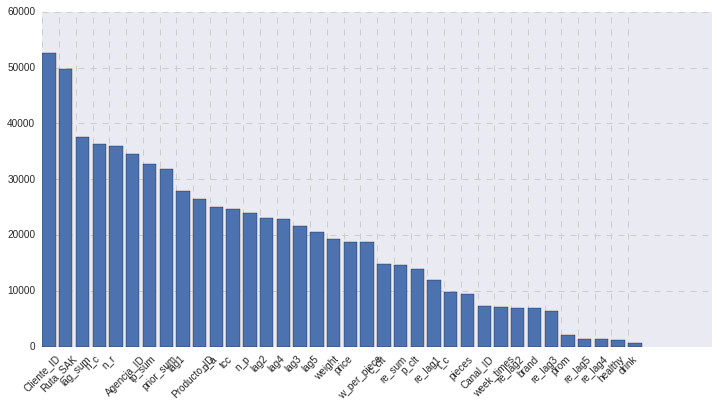

In [32]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'grid.color': '.8','grid.linestyle': u'--'}) 
%matplotlib inline

figsize(12, 6)
plt.bar(w['id'], w['count'], tick_label=w['name'])

plt.xticks(rotation=45)


In [20]:
# Save predictions to an SArray
predictions = model.predict(train)

# Evaluate the model and save the results into a dictionary
results = model.evaluate(train)
print results


{'max_error': 6.300516724586487, 'rmse': 0.4389403189567331}


## predict

In [33]:
test = gl.SFrame.read_csv(path + 'test_lag5_w9.csv', verbose=False)


In [34]:
town = gl.SFrame.read_csv(path + 'towns.csv', verbose=False)
test = test.join(town, on=['Agencia_ID','Producto_ID'], how='left')
test = test.fillna('t_c',1)
test = test.fillna('tcc',0)
test = test.fillna('tp_sum',0)
del test['Town']

In [36]:
relag_test = gl.SFrame.read_csv(path + 're_lag_test.csv', verbose=False)
test = test.join(relag_test, on=['Cliente_ID','Producto_ID','Semana'], how='left')
test = test.fillna('re_lag1',0)
test = test.fillna('re_lag2',0)
test = test.fillna('re_lag3',0)
test = test.fillna('re_lag4',0)
test = test.fillna('re_lag5',0)
del relag_test


In [37]:
pd = gl.SFrame.read_csv(path + 'products.csv', verbose=False)
test = test.join(pd, on=['Producto_ID'], how='left')
test = test.fillna('prom',0)
test = test.fillna('weight',0)
test = test.fillna('pieces',1)
test = test.fillna('w_per_piece',0)
test = test.fillna('healthy',0)
test = test.fillna('drink',0)
del pd

In [38]:
client = gl.SFrame.read_csv(path + 'clients.csv', verbose=False)
test = test.join(client, on=['Cliente_ID'], how='left')
del client
test['re_sum'] = (test['re_lag1'] + test['re_lag2'] + test['re_lag3'] + test['re_lag4'] + test['re_lag5'])/5

In [39]:
del test['Semana']

In [40]:
ids = test['id']

In [41]:
del test['id']

In [42]:
demand_log = model.predict(test)

In [43]:
sub = gl.SFrame({'id':ids,'Demanda_uni_equil':demand_log})

In [44]:
import math
sub['Demanda_uni_equil'] = sub['Demanda_uni_equil'].apply(lambda x: math.expm1(max(0, x)))

In [45]:
sub

Demanda_uni_equil,id
8.29601345572,2458646
4.1408918782,5540219
10.1263488197,3276437
23.8299936871,52194
2.0706425808,5461002
4.27221926309,4600038
4.55930740288,1067191
1.53907784382,5502478
11.3651683784,5099473
16.2109082702,766587


In [46]:
sub.save(path+'gbrt_sub_w9_full1.csv',format='csv')

In [43]:
math.expm1(math.log1p(2))

1.9999999999999996

In [71]:
model1 = gl.boosted_trees_regression.create(train, target='Demada_log',
                                           step_size=0.1,
                                           max_iterations=4,
                                           max_depth = 10,
                                          metric='rmse',
                                          random_seed=395,
                                          column_subsample=0.7,
                                          row_subsample=0.85,
                                          validation_set=None,
                                          resume_from_checkpoint=path+'model_checkpoint_4',
                                           model_checkpoint_path=path,
                                          model_checkpoint_interval=2)

Resuming from checkpoint at /home/zongyi/bimbo_data/model_checkpoint_4

Boosted trees regression:

--------------------------------------------------------

Number of examples          : 20815581

Number of features          : 21

Number of unpacked features : 21

Resumed training from checkpoint at iteration 4 which is greater than or equal to max_iterations 4